In [4]:
import pandas as pd

In [5]:
survey = pd.read_csv('survey.csv')

In [6]:
survey.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [7]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
state = survey[survey['state'].isnull()]

In [9]:
state['Country'].value_counts()

United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
United States              11
India                      10
New Zealand                 8
Italy                       7
Sweden                      7
Switzerland                 7
Poland                      7
South Africa                6
Belgium                     6
Brazil                      6
Singapore                   4
Israel                      4
Mexico                      3
Finland                     3
Austria                     3
Russia                      3
Bulgaria                    3
Colombia                    2
Denmark                     2
Greece                      2
Portugal                    2
Croatia                     2
Hungary                     1
Uruguay                     1
Bosnia and Herzegovina      1
Georgia                     1
Romania   

In [10]:
#Looks like information for state is missing because there were options only for states in the USA.

In [11]:
survey['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [12]:
#We can try filling in self_employed information using other indicators in the data, like number of colleagues.

In [13]:
se_isnull = survey[survey['self_employed'].isnull()]

In [14]:
se_isnull['no_employees'].value_counts()

6-25              6
26-100            5
100-500           3
1-5               2
500-1000          1
More than 1000    1
Name: no_employees, dtype: int64

In [15]:
se_isnull['Age'].value_counts()

31    3
29    2
23    2
42    2
32    2
27    1
44    1
39    1
37    1
36    1
35    1
33    1
Name: Age, dtype: int64

In [16]:
se_isnull['supervisor'].value_counts()

Yes             11
No               5
Some of them     2
Name: supervisor, dtype: int64

In [17]:
#If they answered yes to this, I'm guessing they must currently have supervisors and are not self-employed.

In [18]:
#I will fill in the Nan's as no's.

In [19]:
se = survey['self_employed']

In [59]:
for i in range(len(se)):
    if pd.isnull(se[i]):
        se[i] = "No"

In [21]:
survey['self_employed'] = se

In [22]:
#Cleaning up gender column

In [23]:
survey["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
maile                                               1
p                                                   1
femail                                              1
Female (cis)                

In [24]:
survey["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
maile                                               1
p                                                   1
femail                                              1
Female (cis)                

In [25]:
survey.loc[survey['Gender'].str.contains('trans', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('queer', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('fluid', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('fem', case=False,na=False),'Gender']=2
survey.loc[survey['Gender'].str.contains('Woman', case=False,na=False),'Gender']=2
survey.loc[survey['Gender'].str.contains('m', case=False,na=False),'Gender']=1
survey.loc[survey['Gender'].str.contains('f', case=False,na=False),'Gender']=2
survey.loc[survey['Gender'].str.contains('a', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('e', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('p', case=False,na=False),'Gender']=0
survey.loc[survey['Gender'].str.contains('u', case=False,na=False),'Gender']=0

In [26]:
survey["Gender"].value_counts()

1    994
2    247
0     18
Name: Gender, dtype: int64

In [27]:
#Cleaning up Age column

In [28]:
survey['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [29]:
survey[(survey<100) & (survey>0)].mean(axis=0,skipna=True,numeric_only=True)

Age    32.019139
dtype: float64

In [30]:
age = survey['Age']

In [58]:
for i in range(len(age)):
    if age[i] < 0:
        age[i] = 32
    elif age[i] > 100:
        age[i] = 32

In [32]:
age.mean()

32.01906274821287

In [33]:
survey['Age'] = age

In [34]:
#Let's look at family history.

In [35]:
survey['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [36]:
#Let's look at treatment.

In [37]:
survey['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [38]:
survey['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [39]:
survey['remote_work'].value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

In [40]:
survey['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [41]:
survey['benefits'].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [42]:
survey['care_options'].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [43]:
survey['wellness_program'].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

In [44]:
survey['seek_help'].value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

In [45]:
survey['anonymity'].value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

In [46]:
survey['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [47]:
survey['mental_health_consequence'].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

In [48]:
survey['phys_health_consequence'].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

In [49]:
survey['coworkers'].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

In [50]:
survey['supervisor'].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

In [51]:
survey['mental_health_interview'].value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

In [52]:
survey['phys_health_consequence'].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

In [53]:
survey['mental_vs_physical'].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [54]:
survey['obs_consequence'].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [88]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [89]:
import numpy as np

In [87]:
survey['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

In [117]:
import seaborn as sns
#First, I want to look at how employees from various company sizes feel that their work is affected by a mental health condition.

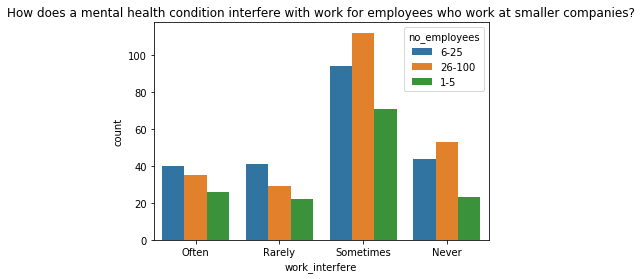

In [137]:
sns.countplot(x = 'work_interfere', hue = 'no_employees', data = survey_small)
plt.title("How does a mental health condition interfere with work for employees who work at smaller companies?")
plt.show()

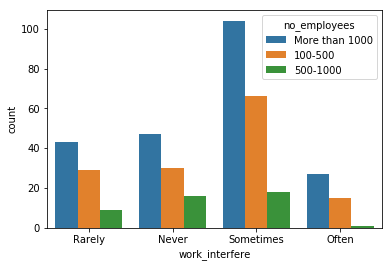

In [114]:
sns.countplot(x = 'work_interfere', hue = 'no_employees', data = survey_large)

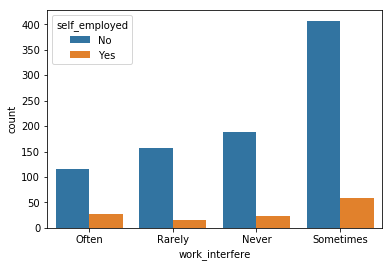

In [119]:
#How about whether or not work is affected for people who are self-employed?
sns.countplot(x = 'work_interfere', hue = 'self_employed', data = survey)

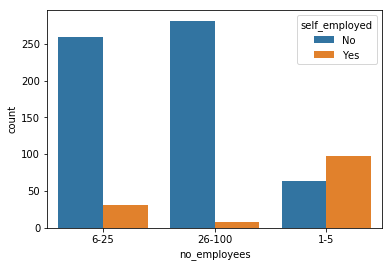

In [118]:
sns.countplot(x = 'no_employees', hue = 'self_employed', data = survey_small)

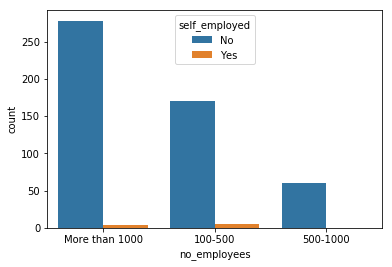

In [120]:
sns.countplot(x = 'no_employees', hue = 'self_employed', data = survey_large)

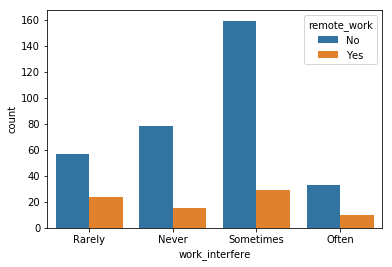

In [116]:
#How about whether or not work is affected for people who work remotely?
sns.countplot(x = 'work_interfere', hue = 'remote_work', data = survey_large)

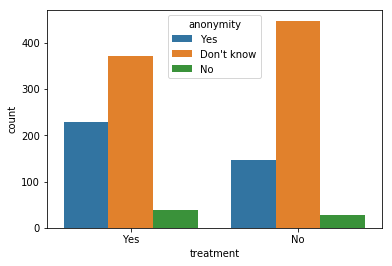

In [122]:
sns.countplot(x = 'treatment', hue = 'anonymity', data = survey)

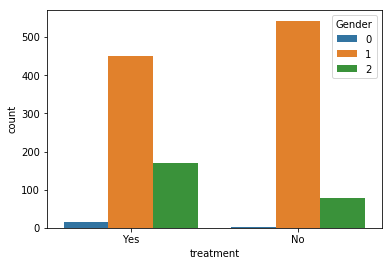

In [121]:
sns.countplot(x = 'treatment', hue = 'Gender', data = survey)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

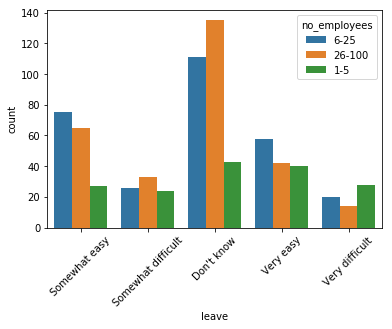

In [129]:
sns.countplot(x = 'leave', hue = 'no_employees', data = survey_small)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

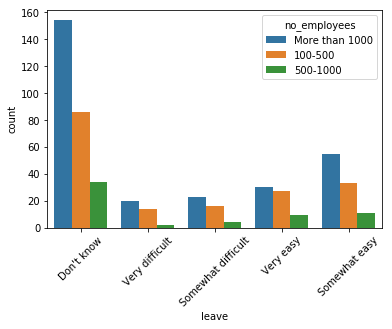

In [132]:
sns.countplot(x = 'leave', hue = 'no_employees', data = survey_large)
plt.xticks(rotation = 45)

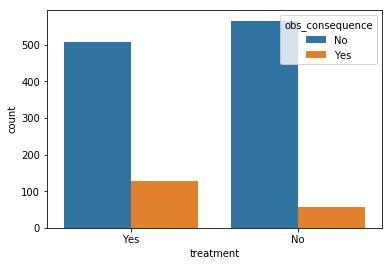

In [135]:
sns.countplot(x = 'treatment', hue = 'obs_consequence', data = survey)